## Titanic

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("Titanic-Dataset.csv")

#### EDA / Preprocessing

In [53]:
print(df.shape)
print(df.info())
df

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

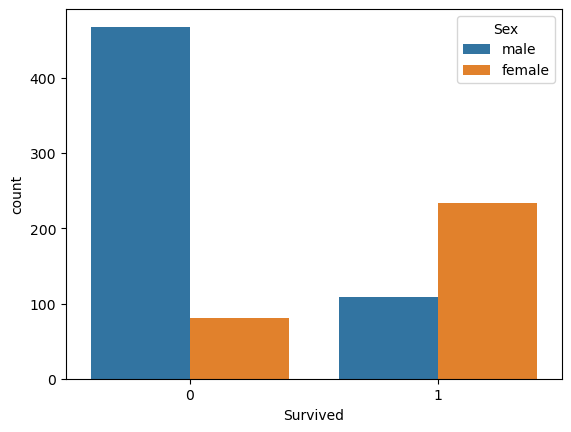

In [55]:
## 생존여부와 성별

sns.countplot(x ="Survived", hue= "Sex", data=df)

<Axes: xlabel='Age', ylabel='Count'>

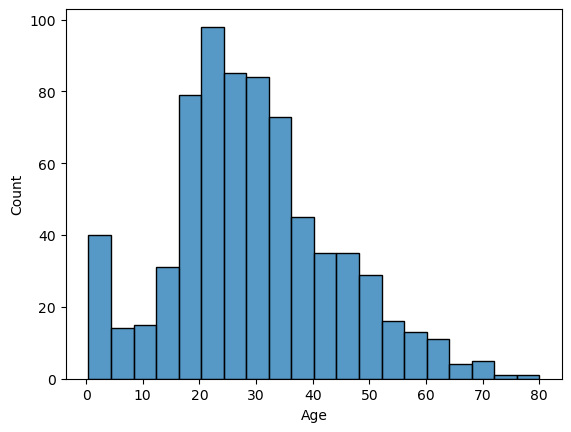

In [56]:
## 나이대

sns.histplot(x = "Age", data= df)

<Axes: xlabel='Pclass', ylabel='Age'>

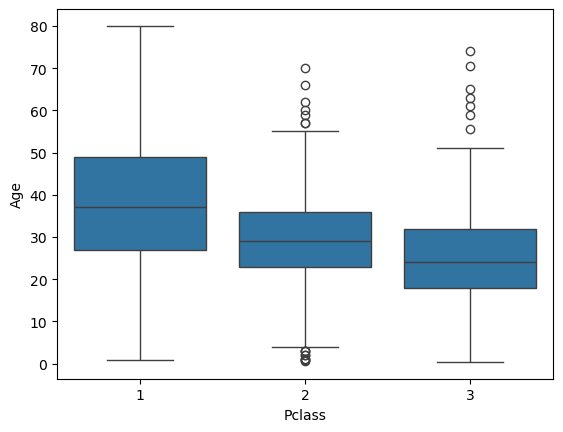

In [57]:
## 고객등급과 나이
sns.boxplot(x = "Pclass", y = "Age", data= df)

- 유의미한 관계가 보인다

<Axes: xlabel='Sex', ylabel='Age'>

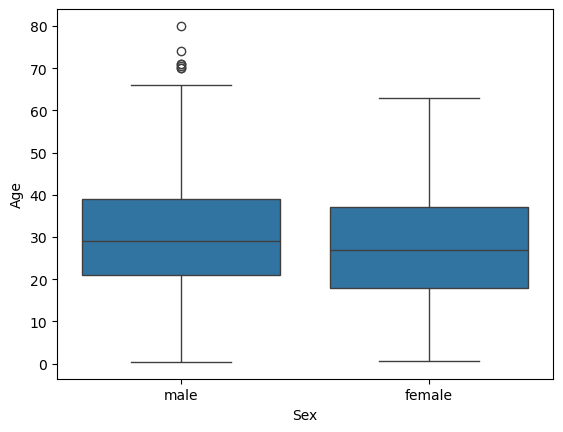

In [58]:
sns.boxplot(x = "Sex", y = "Age", data= df)

- 성별과 나이는 큰 관계가 없어보인다

In [59]:
## 
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [60]:
## corr

df[["Survived", "Pclass", "Age", "Fare"]].corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.338481,-0.077221,0.257307
Pclass,-0.338481,1.000000,-0.369226,-0.549500
Age,-0.077221,-0.369226,1.000000,0.096067
Fare,0.257307,-0.549500,0.096067,1.000000


- Pclass 기반으로 Age 결측값을 채워넣으면 될듯하다


In [61]:
pclassAge = df.groupby("Pclass")["Age"].mean()
round(pclassAge)

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

- 각 승객 등급별 평균으로 채워넣기

In [62]:
Age = {
    1 : round(pclassAge[1]),
    2 : round(pclassAge[2]),
    3 : round(pclassAge[3])
}

df["Age"].fillna(df["Pclass"].map(Age), inplace= True)

- Embarked는 결측값이 많이 없기 때문에 최빈값으로 대체

In [63]:
df["Embarked"].fillna("S", inplace=True)

In [64]:
df["Cabin"].isnull().value_counts()

Cabin
True     687
False    204
Name: count, dtype: int64

- 결측값의 비중이 매우크다
- 과감하게 버림 

In [65]:
df.drop(labels = "Cabin", axis = 1, inplace= True)

In [66]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


- 범주형 자료 정리 및 필요없는 피처 드롭

In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
df.drop(labels = ["Name", "Ticket"], axis= 1, inplace= True)


In [69]:
## 원핫 인코딩
encoder = OneHotEncoder(sparse_output= False)

encoded = encoder.fit_transform(df[["Embarked"]])

embarked_encode = pd.DataFrame(encoded, columns= encoder.get_feature_names_out())

In [70]:
## 이진 피처 변환

df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)


In [76]:
df.drop(labels = "Embarked", axis = 1, inplace =True)

In [79]:
df = pd.concat([df, embarked_encode], axis= 1)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [81]:
X = df.drop(labels = "Survived", axis= 1)
y = df["Survived"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [83]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_train_predict = model.predict(X_train)
print(f"Training Accuracy Score : {accuracy_score(y_train, y_train_predict)}")

y_test_predict = model.predict(X_test)
print(f"Testing Accuracy Score  : {accuracy_score(y_test, y_test_predict)}")

Training Accuracy Score : 1.0
Testing Accuracy Score  : 0.820627802690583


- 테스트의 예측 점수는 만족스럽지만
- 과적합의 가능성이 높아보인다.

In [87]:
from sklearn.model_selection import GridSearchCV

In [90]:
## 그리드 서치를 사용한 최적의 파라미터 탐색

param_grid = {
    "n_estimators": [50, 100, 200],  
    "max_depth": [None, 10, 20, 30],  
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv =5 ,verbose= 1,scoring='f1', n_jobs= -1)
grid_search.fit(X_train, y_train)

print("Best parameters             : ", grid_search.best_params_)
print("Best cross-validation score : ", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters             :  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score :  0.7525716551489748


In [ ]:
## 베스트 모델

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
print(f"Training Accuracy Score : {accuracy_score(y_train, y_train_pred)}")

y_test_pred = best_model.predict(X_test)
print(f"Testing Accuracy Score  : {accuracy_score(y_test, y_test_pred)}")

Training Accuracy Score : 0.9431137724550899
Testing Accuracy Score  : 0.8295964125560538


In [95]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.87       132
           1       0.86      0.69      0.77        91

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223

